In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.ticker as ticker


df=pd.read_csv('Data.csv')
df.head()

,Pysics,Science,Statistics,Math
0,64,67,69,68
1,74,74,63,67
2,60,59,55,57
3,84,88,89,91
4,80,88,78,82


In [8]:
df.describe()

,Pysics,Science,Statistics,Math
count,450.000000,450.000000,450.000000,450.000000
mean,71.746667,72.662222,73.757778,74.586667
std,16.066061,14.333186,12.163017,11.476239
min,0.000000,0.000000,22.000000,22.000000
25%,66.000000,66.000000,67.000000,67.000000
50%,74.000000,74.000000,74.000000,74.000000
75%,82.000000,82.000000,83.000000,83.000000
max,99.000000,99.000000,100.000000,99.000000


# EXPLORATORY DATA ANALYSIS

Average of grade= 74.58666666666667
Min grade= 22
Min grade= 99


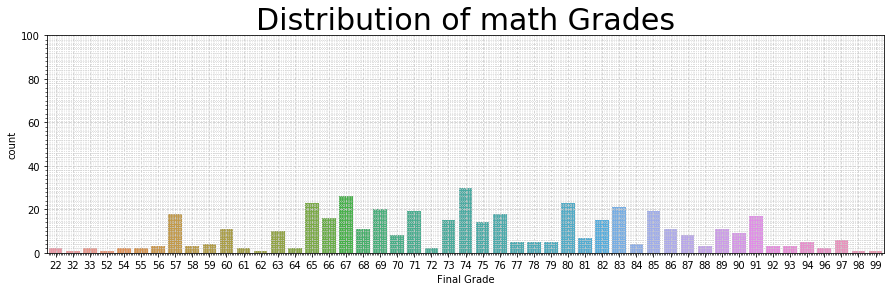

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

fig, ax = plt.subplots(figsize=(15, 4))

# Set axis ranges; by default this will put major ticks every 25.
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

b = sns.countplot(df['Math'])
b.axes.set_title('Distribution of math Grades', fontsize = 30)
b.set_xlabel('Final Grade', fontsize = 10)

# Change major ticks 
#ax.xaxis.set_major_locator(MultipleLocator(10))
#ax.yaxis.set_major_locator(MultipleLocator(20))

# Change minor ticks to show every 5. (20/4 = 5)
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')
print('Average of grade=', (df['Math'].mean()))
print('Min grade=', (df['Math'].min()))
print('Min grade=', (df['Math'].max()))

The distribution countplot of math shown several value distributed across 


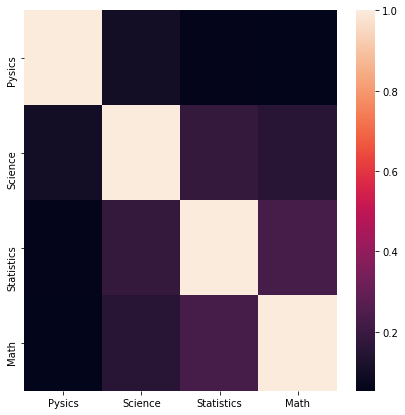

In [10]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(7, 7))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, square=False)
plt.show()

we can see the corellation . most of these doesnt corelate to each other


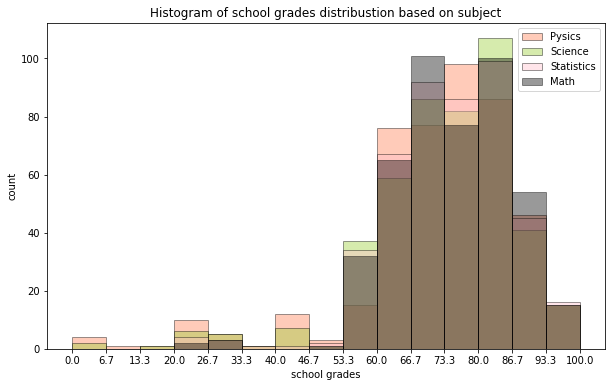

In [45]:
# let's get the x-tick values
count, bin_edges = np.histogram(df, 15)
 
# un-stacked histogram
df.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.4,
          xticks=bin_edges,
          color=['coral', 'yellowgreen', 'pink','black']
         )
 
plt.title('Histogram of school grades distribustion based on subject')
plt.ylabel('count')
plt.xlabel('school grades')
 
plt.show()

The comparison of each subject by histogram. Shown most of them doesnt have much difference distribution

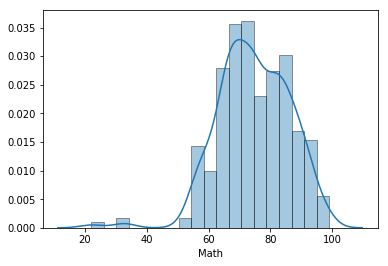

In [43]:
sns.distplot(df['Math'])

Single distribution plot of math ,skewed distribution not normal distribution

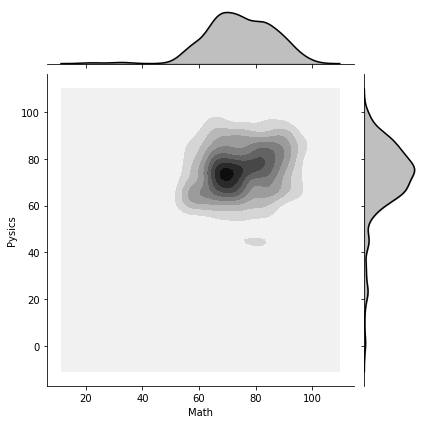

In [13]:
sns.jointplot(x ='Math',y = 'Pysics',data = df,kind = 'kde',color = 'black') 

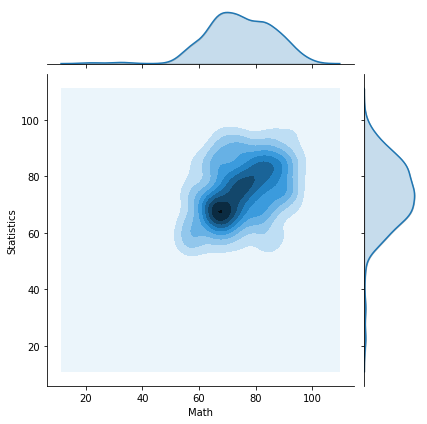

In [29]:
sns.jointplot(x ='Math',y = 'Statistics',data = df,kind = 'kde') 

KDE distribution doesnt show any significance attribute change by comparison


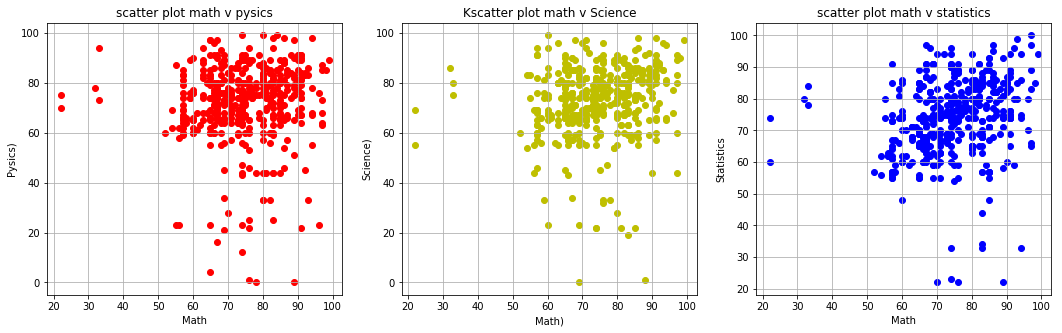

In [15]:
plt.figure('Grade school',figsize=(18,5))

plt.subplot(131)
plt.scatter(
        df['Math'],
        df['Pysics'],
        color = 'r',
        marker = 'o')  


plt.title('scatter plot math v pysics')
plt.xlabel('Math')
plt.ylabel('Pysics)')
plt.grid(True)
#=======================================
plt.subplot(132)
plt.scatter(
        df['Math'],
       df['Science'],
        color = 'y',
        marker = 'o')  


plt.title('Kscatter plot math v Science')
plt.xlabel('Math)')
plt.ylabel('Science)')
plt.grid(True)
#=====================================================
plt.subplot(133)
plt.scatter(
        df['Math'],
        df['Statistics'],
        color = 'b',
        marker = 'o') 

plt.title('scatter plot math v statistics')
plt.xlabel('Math')
plt.ylabel('Statistics')
plt.grid(True)

Scatterplot distribution of math VS other object. 

# MODEL COMPARISON

In [19]:

x=df.drop('Math',axis=1)
y=df['Math']

In [21]:
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
from sklearn.model_selection import cross_val_predict

def rmse_cv(model):
    return np.sqrt(-cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=5))

In [22]:
model_lr=LinearRegression()
rmse_cv(model_lr).mean()

11.43302332594437

model specifiacation with linear regression is less than 12%


In [25]:
model_ridge=RidgeCV(alphas=[1,0.1,0.01,0.0005])
rmse_cv(model_ridge).mean()

11.43301611093548

In [26]:
model_lasso=LassoCV(alphas=[1,0.1,0.01,0.0005])
rmse_cv(model_lasso).mean()

c:\users\blazt\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\blazt\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\blazt\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\blazt\appdata\local\programs\python\python37\lib\site-packages\sklearn\mo

11.437413205504988

Linear regression & ridge regression has less RMSE square than Lasso . so , we can exclude lasso( even though it still not a significance ammount)

# FEATURE IMPORTANCE

In [34]:
coef=pd.Series(model_ridge.fit(x,y).coef_,index=x.columns)

In [39]:
imp_coef = pd.concat([coef.sort_values().head(10)])

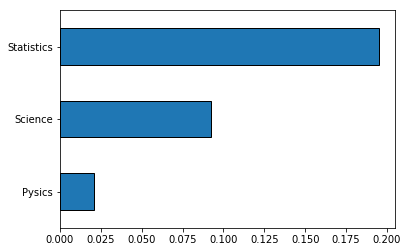

In [40]:
imp_coef.plot(kind='barh')

Concluscion : based on our model comparison we use Ridge Regression for model for less RMSE. Then using feature importance based on ridge regression . It is shown that the most importance factor of math grade is STATISTICS followed up by science.